In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sample_submission.csv")


print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


Saving sample_submission.csv to sample_submission (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (1).csv
Train shape: (550068, 12)
Test shape: (233599, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
User_ID       

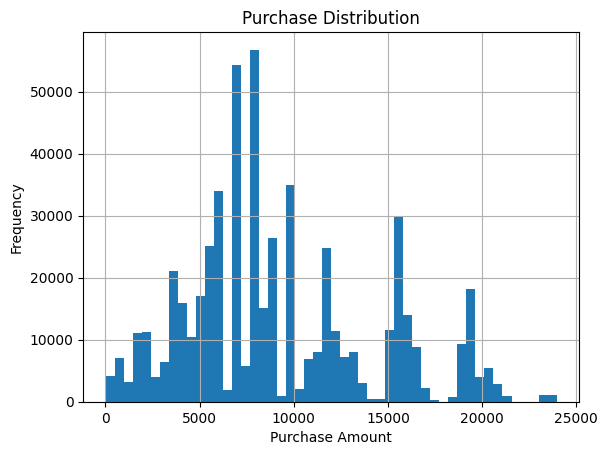

In [ ]:

train.info()


print(train.isnull().sum())


train['Purchase'].hist(bins=50)
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.title("Purchase Distribution")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer


target = "Purchase"

cat_cols = ["Gender","Age","City_Category","Stay_In_Current_City_Years","Product_ID","User_ID"]
num_cols = ["Occupation","Marital_Status","Product_Category_1","Product_Category_2","Product_Category_3"]


num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])


In [ ]:
duplicates = train.duplicated().sum()
print("Number of exact duplicate rows in train:", duplicates)


Number of exact duplicate rows in train: 0


In [ ]:
duplicates = test.duplicated().sum()
print("Number of exact duplicate rows in test:", duplicates)


Number of exact duplicate rows in test: 0


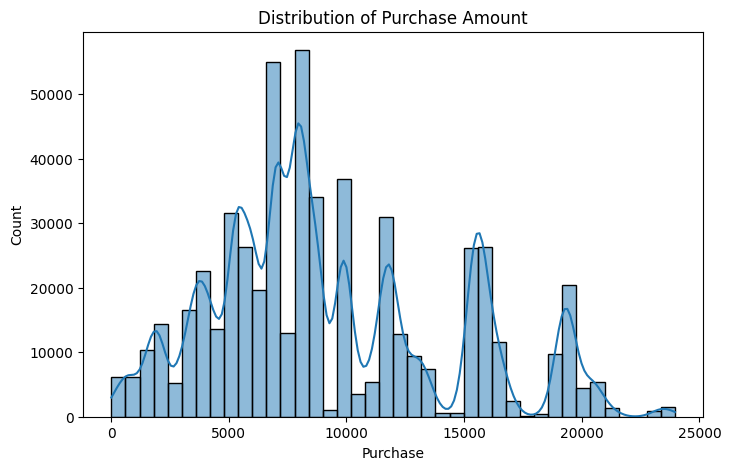

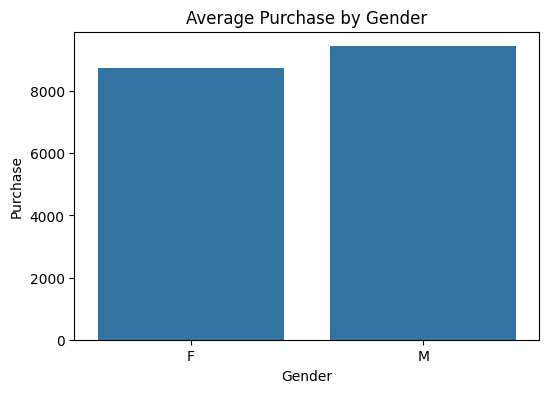

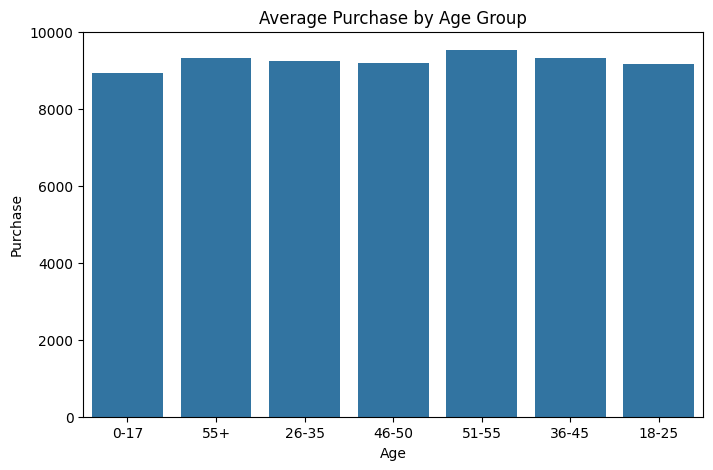

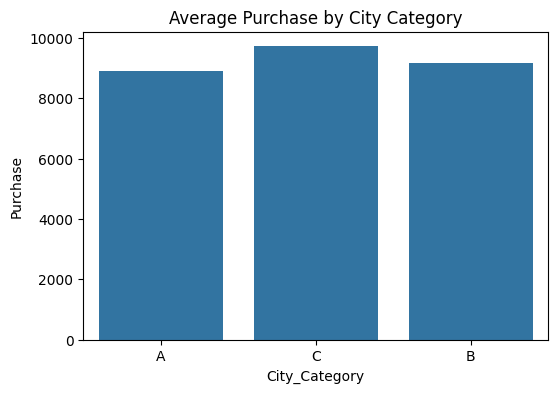

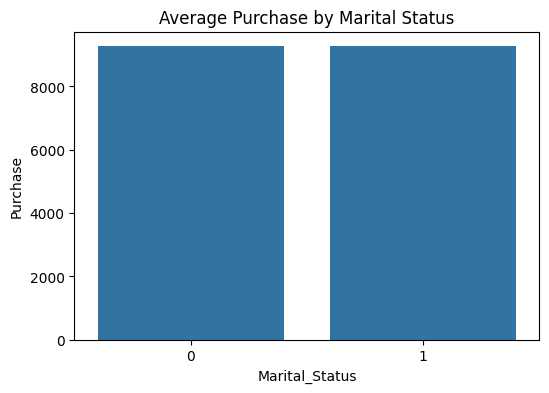

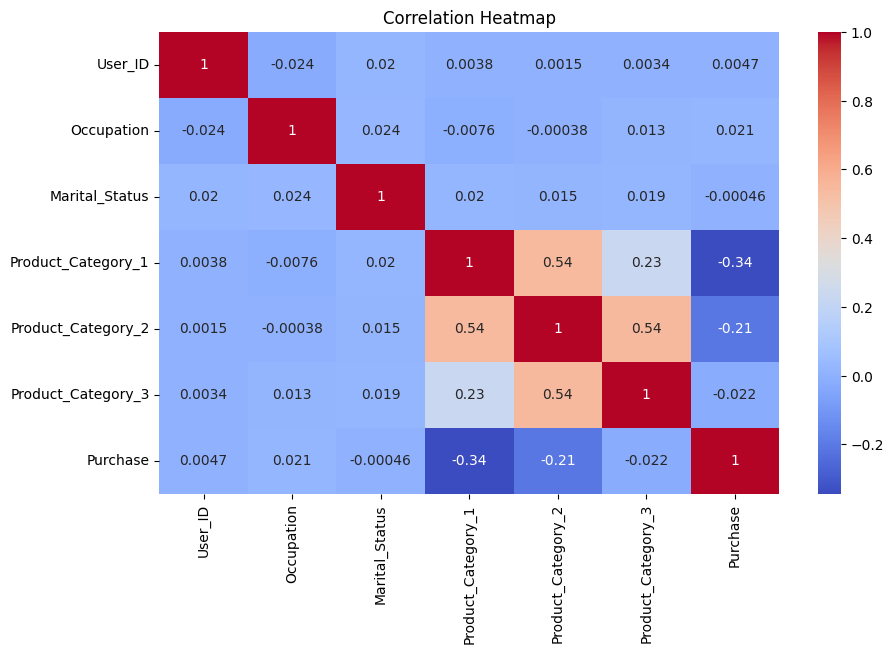

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copy the train dataset for EDA
eda_df = train.copy()

# 1. Distribution of Target Variable (Purchase Amount)
plt.figure(figsize=(8,5))
sns.histplot(eda_df["Purchase"], bins=40, kde=True)
plt.title("Distribution of Purchase Amount")
plt.show()

# 2. Purchase vs Gender
plt.figure(figsize=(6,4))
sns.barplot(data=eda_df, x="Gender", y="Purchase", estimator="mean", errorbar=None)
plt.title("Average Purchase by Gender")
plt.show()

# 3. Purchase vs Age
plt.figure(figsize=(8,5))
sns.barplot(data=eda_df, x="Age", y="Purchase", estimator="mean", errorbar=None)
plt.title("Average Purchase by Age Group")
plt.show()

# 4. Purchase vs City Category
plt.figure(figsize=(6,4))
sns.barplot(data=eda_df, x="City_Category", y="Purchase", estimator="mean", errorbar=None)
plt.title("Average Purchase by City Category")
plt.show()

# 5. Purchase vs Marital Status
plt.figure(figsize=(6,4))
sns.barplot(data=eda_df, x="Marital_Status", y="Purchase", estimator="mean", errorbar=None)
plt.title("Average Purchase by Marital Status")
plt.show()

# 6. Correlation Heatmap (numerical features)
plt.figure(figsize=(10,6))
sns.heatmap(eda_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [9]:
#decisiontreeregressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import numpy as np


X = train[cat_cols + num_cols]
y = train[target]


X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)


dt_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeRegressor(
        max_depth=10,
        random_state=42
    ))
])


dt_model.fit(X_train, y_train)


dt_preds = dt_model.predict(X_valid)


dt_rmse = np.sqrt(mean_squared_error(y_valid, dt_preds))
print("Decision Tree RMSE:", dt_rmse)

Decision Tree RMSE: 2850.7836065238166


In [12]:
# Random Forest Regressor


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X = train[cat_cols + num_cols]
y = train[target]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        n_jobs=-1,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_valid)

rf_rmse = np.sqrt(mean_squared_error(y_valid, rf_preds))
print("Random Forest RMSE:", rf_rmse)

Random Forest RMSE: 2719.4869127676334


In [14]:
# XGBoost Regressor


from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import numpy as np

X = train[cat_cols + num_cols]
y = train[target]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_valid)

xgb_rmse = np.sqrt(mean_squared_error(y_valid, xgb_preds))
print("XGBoost RMSE:", xgb_rmse)

XGBoost RMSE: 2587.0555656962606


In [16]:
# Submission: Decision Tree

dt_final = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeRegressor(
        max_depth=10,
        random_state=42
    ))
])

dt_final.fit(train[cat_cols + num_cols], train[target])


dt_test_preds = dt_final.predict(test[cat_cols + num_cols])


submission_dt = sample_sub.copy()
submission_dt["Purchase"] = dt_test_preds

submission_dt.to_csv("submission_decisiontree.csv", index=False)
print("✅ Decision Tree submission file created!")

✅ Decision Tree submission file created!


In [18]:
# Submission: Random Forest


rf_final = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        n_jobs=-1,
        random_state=42
    ))
])

rf_final.fit(train[cat_cols + num_cols], train[target])

rf_test_preds = rf_final.predict(test[cat_cols + num_cols])

submission_rf = sample_sub.copy()
submission_rf["Purchase"] = rf_test_preds

submission_rf.to_csv("submission_randomforest.csv", index=False)
print("✅ Random Forest submission file created!")

✅ Random Forest submission file created!


In [20]:
# Submission: XGBoost


xgb_final = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

xgb_final.fit(train[cat_cols + num_cols], train[target])

xgb_test_preds = xgb_final.predict(test[cat_cols + num_cols])

submission_xgb = sample_sub.copy()
submission_xgb["Purchase"] = xgb_test_preds

submission_xgb.to_csv("submission_xgboost.csv", index=False)
print("✅ XGBoost submission file created!")

✅ XGBoost submission file created!


In [21]:
from google.colab import files


submission_files = [
    "submission_decisiontree.csv",
    "submission_randomforest.csv",
    "submission_xgboost.csv"

]


for file in submission_files:
    try:
        files.download(file)
        print(f"✅ Downloading {file} ...")
    except:
        print(f"⚠️ File {file} not found, maybe you haven't created it yet.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloading submission_decisiontree.csv ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloading submission_randomforest.csv ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloading submission_xgboost.csv ...


In [22]:
import pandas as pd

df = pd.read_csv("submission_xgboost.csv")
print(df.head())
print(df.shape)


     Purchase  User_ID Product_ID
0  14614.7500  1000004  P00128942
1  10394.0510  1000009  P00113442
2   6904.1940  1000010  P00288442
3   2961.0837  1000010  P00145342
4   2712.4446  1000011  P00053842
(233599, 3)
